In [1]:
import os
import os.path as osp
import mmcv
import numpy as np
import matplotlib.pyplot as plt
import sys
os.chdir('/home/damon/Github/mmlab/mmdetection/')
%load_ext autoreload
%autoreload 2
sys.path.append('/home/damon/detorch/')
from visualization_utils import *
from debug_utils import *

In [2]:
from visdrone.utils.test_augs import *
from mmdet.datasets import get_dataset
from mmdet.datasets import extra_aug

In [17]:
cfg = 'visdrone/configs/ssd300_debug.py'
cfg = mmcv.Config.fromfile(cfg)
ds = get_dataset(cfg.data.train).dataset

idx = 0
img_info = ds.img_infos[idx]
# load image
img = mmcv.imread(osp.join(ds.img_prefix, img_info['filename']))
ann = ds.get_ann_info(idx)
gt_bboxes = ann['bboxes']
gt_labels = ann['labels']

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load_annotations time: 0.0s from /tmp/visdrone-debug/annotations_debug.json


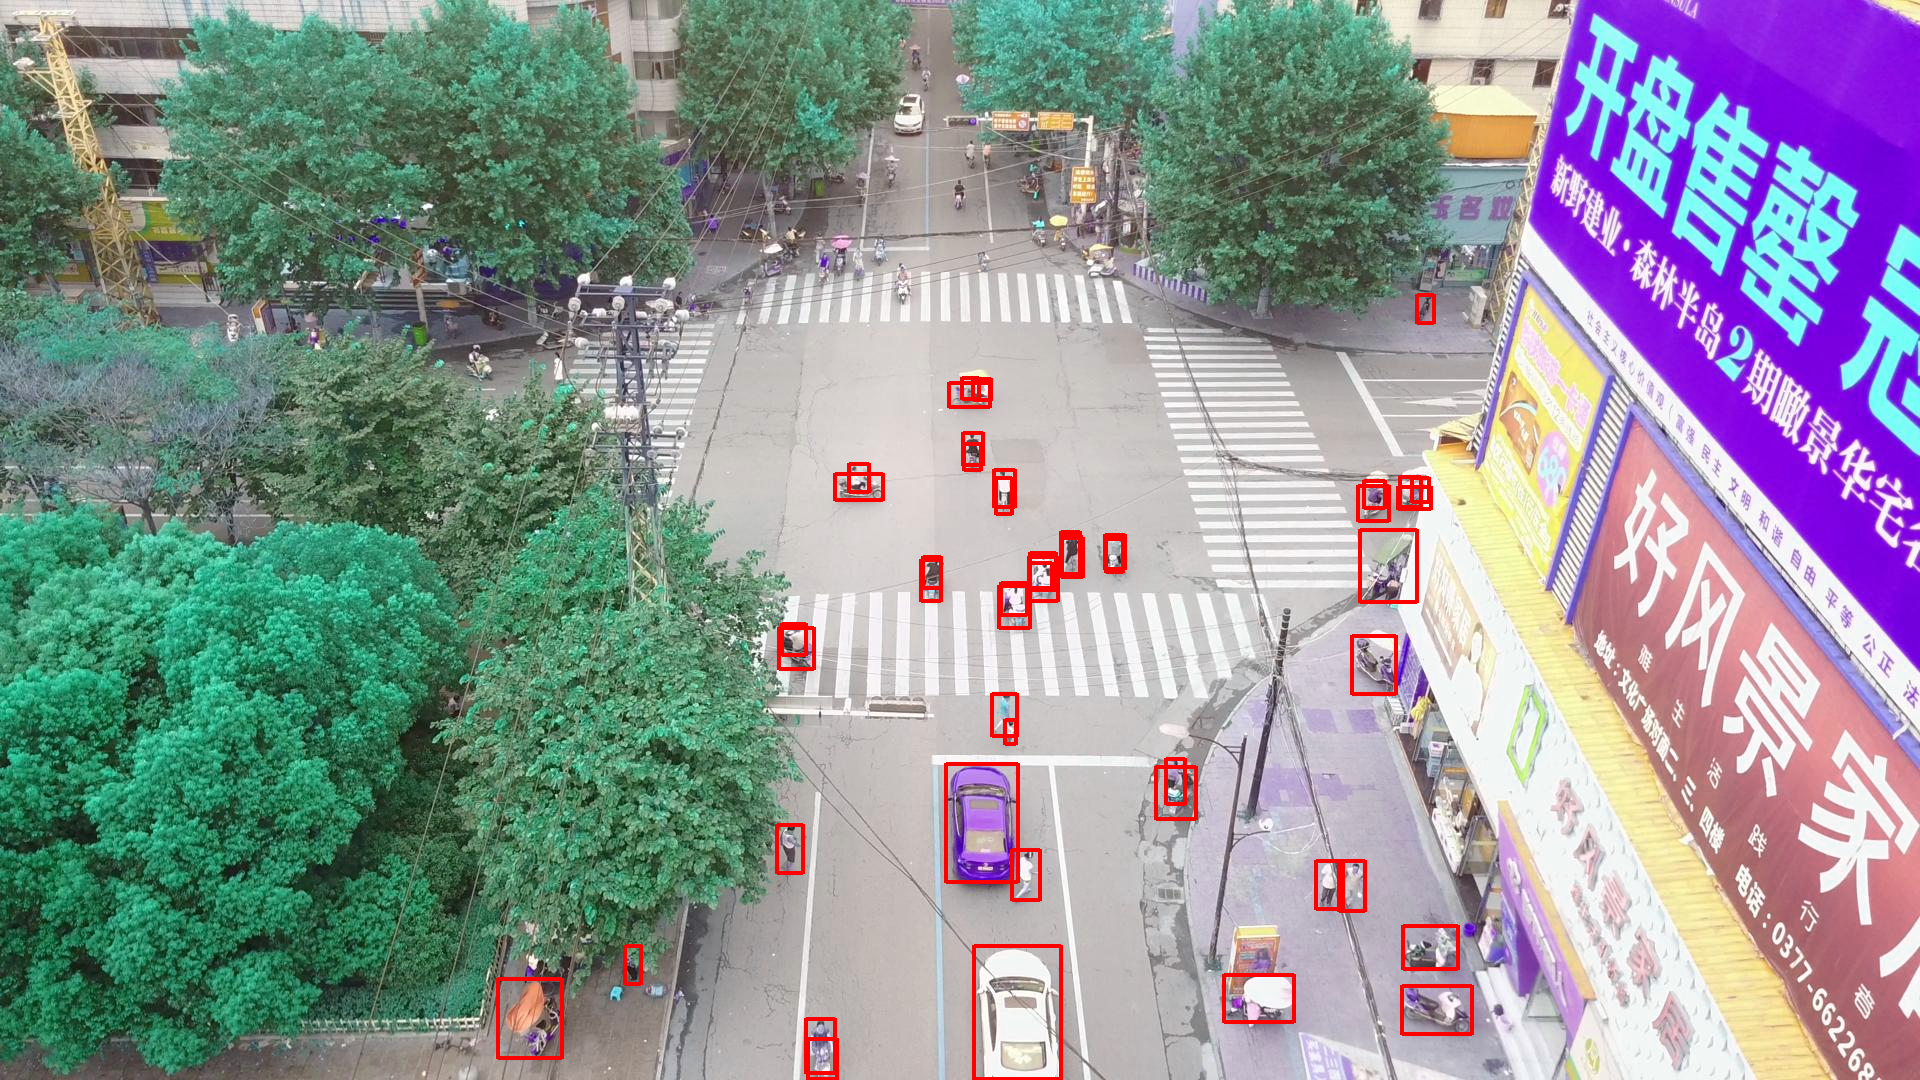

In [18]:
swap = lambda b: np.stack([b[:, 1], b[:, 0], b[:, 3], b[:, 2]], 1)
ret = draw_bounding_boxes_on_image_array(img, boxes=swap(gt_bboxes))
visualize_image_array(ret)

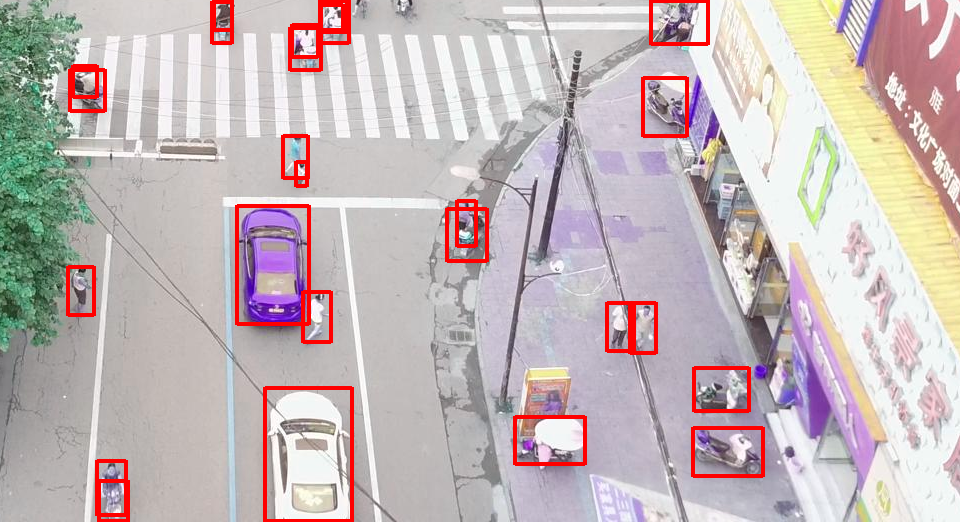

In [111]:
op = extra_aug.RandomPatch(overlap_thresh=0.3)
out = op(img, gt_bboxes, gt_labels)

ret = draw_bounding_boxes_on_image_array(out[0], swap(out[1]))
visualize_image_array(ret)